In [1]:
import warnings
warnings.filterwarnings('ignore')
import copy
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from datetime import datetime, timedelta
import mpl_finance
import matplotlib.ticker as ticker
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\Administrator\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [8]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=310ba359406553083c7f581c9b8c2238cf8add0145c76fb9c82cf737bcfa71cf
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=5489ab53d9791db95007201deb1b1715eb55fbc362bdd98c3fd085f841a1dc65
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py


In [ ]:
# 크롤링
def wait(select):
    while True:
        try:
            driver.find_element_by_css_selector(select)
            break
        except:
            time.sleep(1)
            
start_date = datetime.strptime('2018.06.01','%Y.%m.%d')
end_date = datetime.strptime('2020.06.01','%Y.%m.%d')

driver = webdriver.Chrome(executable_path='E:/bs/python/chromedriver.exe')
driver.implicitly_wait(2)
driver.get('https://www.garak.co.kr/main/main.do')
wait('#gnb > div.gnb_box > ul > li.m_active > a')
driver.find_element_by_xpath('//*[@id="gnb"]/div[2]/ul/li[1]/a').click()
driver.find_element_by_xpath('//*[@id="contents"]/div[1]/div[1]/ul/li[2]/a').click()
time.sleep(0.5)
driver.find_element_by_xpath('//*[@id="contents"]/div[1]/div[1]/ul/li[2]/div/ul/li[5]/a').click()
wait('#oziviw_1 > svg > g > g:nth-child(4) > text > tspan')

df = pd.DataFrame()
while True:
    s_date = str(start_date).split()[0].replace('-','.')
    e_date = str(start_date).split()[0].replace('-','.')
    driver.execute_script("document.getElementsByName('s_date')[0].value=\'" + s_date + "\'")
    driver.execute_script("document.getElementsByName('e_date')[0].value=\'" + e_date + "\'")
    driver.find_element_by_xpath('//*[@id="aForm"]/div[1]/ul/li[3]/span/span[1]/span').click()
    start_date = start_date+timedelta(days=1)
    wait('#select2-total_search-results')
    try: 
        data = []
        columns = []
        driver.find_element_by_xpath('//*[@id="aForm"]/div[1]/div/button[1]').click()
        time.sleep(2)
        x = driver.find_element_by_css_selector('#OZViewer > div:nth-child(1) > label').text
        x = int(x.replace('/ ',''))
        for i in range(x):  
            row = driver.find_element_by_css_selector(f'#oziviw_{i+1} > svg > g').text.split('\n')
            columns = row[row.index('날짜'):row.index('전년 동월동일 평균대비')+1]
            row_data = row[row.index('전년 동월동일 평균대비')+1:row.index('서울시농수산식품공사')]
            for i in range(11,len(row_data)+1,11):
                data.append(row_data[i-11:i])

            df = pd.concat([df, pd.DataFrame(data=data, columns=columns)])
            time.sleep(1)
            driver.find_element_by_xpath('//*[@id="OZViewer"]/div[1]/input[5]').click()
        if start_date == end_date:
            break
    except:
        pass
    
# 크롤링 데이터 csv저장
df2 = copy.deepcopy(ab)
df2 = df2.drop_duplicates()
df2 = df2.reset_index(drop=True)
df2['날짜'] = pd.to_datetime(df2['날짜'])
# df2['날짜'] = df2['날짜'].astype(str)
df2['평균가'] = df2['평균가'].str.replace(',','').astype(int)
df2.to_csv('농작물시세.csv',header=True)

In [91]:
df = df2[df2['거래단위']!='100개']
df = df[df['거래단위']!='100속']
df = df[df['거래단위']!='20개']
df = df[df['거래단위']!='50개']
df = df[df['거래단위']!='5ton트럭']
df = df[df['거래단위']!='8ton트럭']
df = df[df['거래단위']!='100속']
df['거래단위'] = df['거래단위'].str.replace('kg','').str.replace('단','').str.replace('상자'
                        ,'').str.replace('그물망','').str.replace('Kg','').str.replace('개','')
df = df.reset_index()
df = df.iloc[:,1:]

In [92]:
np.unique(df['거래단위'])

array(['0.05', '0.2', '0.25', '0.5', '1', '1.5', '1.6', '10', '12', '13',
       '15', '150g', '16', '17', '18', '2', '2.5', '20', '200g', '23',
       '25', '3', '3.6', '4', '4.5', '400g', '5', '500g', '6', '7', '7.5',
       '8'], dtype=object)

In [73]:
df[df['거래단위']=='150g']

,Unnamed: 0,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비 등락,전일 평균대비,전7일 평균대비,전년 동월동일 평균대비
100992,80,2018-11-17,영양부추,상,150g,2850,3100,3014,164,2850,2653,4603
100993,81,2018-11-17,영양부추,보통,150g,2700,2850,2790,59,2731,2308,4049
100994,82,2018-11-17,영양부추,하,150g,1900,2700,2450,-15,2465,1883,0
101564,80,2018-11-19,영양부추,상,150g,3000,3200,3088,74,3014,2676,3764
101565,81,2018-11-19,영양부추,보통,150g,2750,3000,2866,76,2790,2366,3208
...,...,...,...,...,...,...,...,...,...,...,...,...
248573,74,2019-08-31,영양부추,보통,150g,1250,1350,1311,0,1311,1458,1378
248574,75,2019-08-31,영양부추,하,150g,300,1250,908,0,908,1048,990
249367,73,2019-09-02,영양부추,상,150g,1350,1650,1454,0,1454,1610,1574
249368,74,2019-09-02,영양부추,보통,150g,1250,1350,1311,0,1311,1449,1208


In [93]:
for i in range(df.shape[0]):
    if df['거래단위'][i]=='200g':
        df['거래단위'][i]= '0.2'
    elif df['거래단위'][i]=='500g':
        df['거래단위'][i]= '0.5'
    elif df['거래단위'][i]=='400g':
        df['거래단위'][i]= '0.4'
    elif df['거래단위'][i]=='150g':
        df['거래단위'][i]= '0.15'
    else:
        pass
for i in ['최저가','최고가','전일대비 등락','전일 평균대비','전7일 평균대비','전년 동월동일 평균대비']:
    df['{}'.format(i)] = df['{}'.format(i)].str.replace(',',"")

In [94]:
df['전일 평균대비'] = df['전일 평균대비'].str.split('(').str[0]
df['전7일 평균대비'] = df['전7일 평균대비'].str.split('(').str[0]
df['전년 동월동일 평균대비'] = df['전년 동월동일 평균대비'].str.split('(').str[0]

df['거래단위'] =df['거래단위'].astype(float)
df['최저가'] =df['최저가'].astype(float)
df['최고가'] =df['최고가'].astype(float)
df['평균가'] =df['평균가'].astype(float)
df['전일대비 등락'] =df['전일대비 등락'].astype(float)
df['전일 평균대비'] =df['전일 평균대비'].astype(float)
df['전7일 평균대비'] =df['전7일 평균대비'].astype(float)
df['전년 동월동일 평균대비'] =df['전년 동월동일 평균대비'].astype(float)
df['kg당가격'] = df['평균가']/df['거래단위']
df.to_csv('./상품가격정보.csv')

In [16]:
df= pd.read_csv('./상품가격정보.csv')
df = df.iloc[:,1:]
df.rename(columns = {"날짜": "일시"}, inplace=True)
df.to_csv('./상품가격정보.csv')

In [2]:
df2 = pd.read_csv('data/날씨통합.csv')
df3 = df2.groupby('일시').mean().reset_index()
# df4 =  pd.merge(df, df3 , on="일시")

In [3]:
df22 =df2.iloc[:,1:] 
df22 = df22.dropna()
df22["일강수량(mm)"]=df22["일강수량(mm)"].apply(lambda x: 0.0 if x==0 else 1)
df222 = df22[['지역', '일시', '평균기온(°C)', '평균 상대습도(%)','최고기온(°C)', '최저기온(°C)', 
       '평균 풍속(m/s)', '평균 해면기압(hPa)', 
       '평균 전운량(1/10)','평균 이슬점온도(°C)', '연도','일강수량(mm)']]
df222 = df222[df222['평균 풍속(m/s)']<=13]
df222 = df222[df222['평균 해면기압(hPa)']>=980]
df222['일강수량(mm)'] = df222['일강수량(mm)'].astype(int)
df222.to_csv('날씨최종.csv')


NameError: name 'df2' is not defined

In [11]:
df222 = pd.read_csv('날씨최종.csv').iloc[:,1:]

In [12]:
df3 =df222.groupby('일시').mean().reset_index()

In [14]:
df3.head(1)

,일시,평균기온(°C),평균 상대습도(%),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균 해면기압(hPa),평균 전운량(1/10),평균 이슬점온도(°C),연도,일강수량(mm)
0,1970-06-22,19.802083,80.21875,24.520833,16.572917,1.84375,1002.427083,5.71875,16.197917,1970.0,0.125


In [17]:
df4 =  pd.merge(df, df3 , on="일시")

In [18]:
df4=df4.iloc[:,1:]

In [19]:
df222.iloc[:,2:10].head(2)

,평균기온(°C),평균 상대습도(%),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균 해면기압(hPa),평균 전운량(1/10),평균 이슬점온도(°C)
0,21.333333,70.000000,25.333333,18.666667,2.000000,1003.333333,4.000000,15.666667
1,22.000000,70.333333,26.666667,18.000000,1.666667,1004.666667,2.333333,16.333333


In [13]:
# 이상치 확인
# plt.plot(df222['연도'],df222['평균 이슬점온도(°C)'])

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df222.iloc[:,2:10],df222.iloc[:,-1], test_size=0.2,random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((231613, 8), (57904, 8))

In [97]:
from keras import models
from keras import layers
from keras.layers import Dense, BatchNormalization, Dropout
model=models.Sequential()
model.add(layers.Dense(100,activation='relu', input_shape=(8,))) #은닉층 64개 노드
model.add(layers.Dense(100,activation='relu')) # 은닉층 64개 노드
model.add(layers.Dense(100,activation='relu')) # 은닉층 64개 노드
model.add(layers.Dense(32,activation='relu')) # 은닉층 32개 노드
model.add(layers.Dense(1,activation='sigmoid')) # 출력층 1개 출력 , 주택가격 예측한 가격
# mse : 예측값과 실제 값의 거리(오차)의 제곱
# mae : 예측값과 실제 값의 거리(오차)의 절대값
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=50, epochs=50)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 24,365
Trainable params: 24,365
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.models import load_model

model.save('강수확률.h5')
# '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
#        '평균 풍속(m/s)', '평균 상대습도(%)', '평균 해면기압(hPa)', 
#        '평균 전운량(1/10)', '월' 을 이용

In [24]:
from keras.models import load_model
model = load_model('강수확률.h5')

In [20]:
df4_x = df4

In [21]:
df4_x.iloc[:,:20]

,일시,품목,등급,거래단위,최저가,최고가,평균가,전일대비 등락,전일 평균대비,전7일 평균대비,전년 동월동일 평균대비,kg당가격,평균기온(°C),평균 상대습도(%),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균 해면기압(hPa),평균 전운량(1/10),평균 이슬점온도(°C)
0,2018-06-01,고구마,특,10.0,48000.0,53000.0,50766.0,4066.0,46700.0,51434.0,32707.0,5076.6,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333,12.541621
1,2018-06-01,고구마,상,10.0,42000.0,48000.0,44446.0,2737.0,41709.0,42705.0,22291.0,4444.6,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333,12.541621
2,2018-06-01,고구마,보통,10.0,30000.0,42000.0,36439.0,6061.0,30378.0,31358.0,14725.0,3643.9,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333,12.541621
3,2018-06-01,고구마,하,10.0,8000.0,30000.0,22421.0,6064.0,16357.0,16776.0,6194.0,2242.1,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333,12.541621
4,2018-06-01,호박 고구마,특,10.0,49000.0,53000.0,51328.0,5330.0,45998.0,51425.0,32982.0,5132.8,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333,12.541621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408306,2020-06-02,아보카도 수입,하,10.0,31200.0,48000.0,44811.0,-903.0,45714.0,63565.0,51503.0,4481.1,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256,10.713736
408307,2020-06-02,블루베리 국산,특,1.0,29000.0,40000.0,31101.0,25.0,31076.0,32001.0,33648.0,31101.0,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256,10.713736
408308,2020-06-02,블루베리 국산,상,1.0,23000.0,29000.0,25396.0,529.0,24867.0,25781.0,28931.0,25396.0,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256,10.713736
408309,2020-06-02,블루베리 국산,보통,1.0,15000.0,23000.0,19582.0,399.0,19183.0,20493.0,23847.0,19582.0,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256,10.713736


In [22]:
df4_x.columns

Index(['일시', '품목', '등급', '거래단위', '최저가', '최고가', '평균가', '전일대비 등락', '전일 평균대비',
       '전7일 평균대비', '전년 동월동일 평균대비', 'kg당가격', '평균기온(°C)', '평균 상대습도(%)',
       '최고기온(°C)', '최저기온(°C)', '평균 풍속(m/s)', '평균 해면기압(hPa)', '평균 전운량(1/10)',
       '평균 이슬점온도(°C)', '연도', '일강수량(mm)'],
      dtype='object')

In [23]:
df4_x['최저가'] = df4_x['최저가']/df4_x['거래단위']
df4_x['최고가'] = df4_x['최고가']/df4_x['거래단위']
df4_x['평균가'] = df4_x['평균가']/df4_x['거래단위']
df4_x['전일대비 등락'] = df4_x['전일대비 등락']/df4_x['거래단위']
df4_x['전일 평균대비'] = df4_x['전일 평균대비']/df4_x['거래단위']
df4_x['전7일 평균대비'] = df4_x['전7일 평균대비']/df4_x['거래단위']
df4_x['전년 동월동일 평균대비'] = df4_x['전년 동월동일 평균대비']/df4_x['거래단위']

In [24]:
df4_x['최저가'] = df4_x['최저가']/10000
df4_x['최고가'] = df4_x['최고가']/10000
df4_x['평균가'] = df4_x['평균가']/10000
df4_x['전일대비 등락'] = df4_x['전일대비 등락']/10000
df4_x['전일 평균대비'] = df4_x['전일 평균대비']/10000
df4_x['전7일 평균대비'] = df4_x['전7일 평균대비']/10000
df4_x['전년 동월동일 평균대비'] = df4_x['전년 동월동일 평균대비']/10000

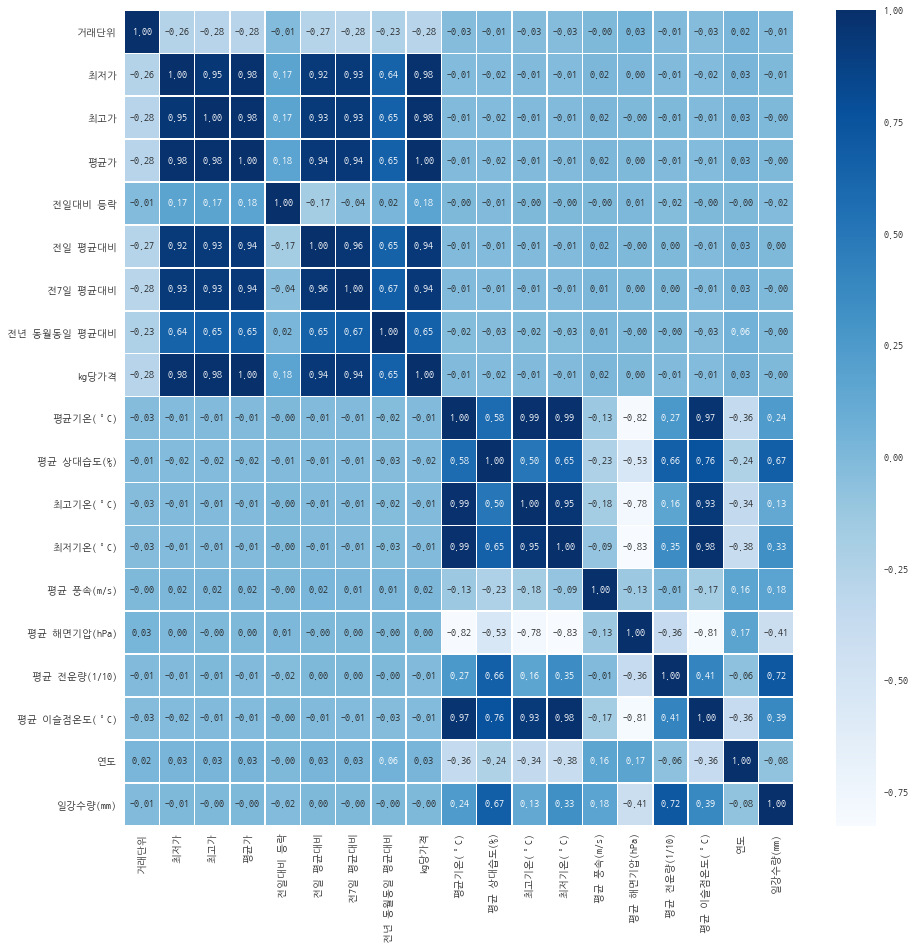

In [25]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = df4_x.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [27]:
df4_xy = df4_x.iloc[:,:11]

In [29]:
kk = pd.concat([df4_x.iloc[:,12:18],df4_x.iloc[:,18:]], axis=1)

In [31]:
main_pp = pd.concat([df4_xy[:],kk[:]],axis=1)
main_pp.columns

Index(['일시', '품목', '등급', '거래단위', '최저가', '최고가', '평균가', '전일대비 등락', '전일 평균대비',
       '전7일 평균대비', '전년 동월동일 평균대비', '평균기온(°C)', '평균 상대습도(%)', '최고기온(°C)',
       '최저기온(°C)', '평균 풍속(m/s)', '평균 해면기압(hPa)', '평균 전운량(1/10)',
       '평균 이슬점온도(°C)', '연도', '일강수량(mm)'],
      dtype='object')

In [42]:
np.unique(main_pp['품목'])
할것 = ['가지''감귤','감자', '고구마', '고수', '곰취나물',
       '곶감 국산', '꽃느타리버섯', '꽈리고추', '냉이', '노각오이', '노랑 파프리카',
       '느타리버섯', '늙은호박', '단호박 수입' ,'당근', '대파(일반)','딸기', '망고 국산', '매실 국산', '메론 머스크',
        '무','배추','복숭아 백도 기타', '복숭아 천도 기타',
       '복숭아 천중도백도', '복숭아 황도 기타', '부추(일반)', '브로코리 국산', '블루베리 국산', '블루베리 수입', '사과 양광', 
       '사과 홍로', '사과 홍옥','산딸기 국산', '살구 개량', 
       '새송이버섯', '생대추', '생표고', '수박(일반)', '시금치','아로니아 국산', 
      '아스파라가스 국산', '아욱', '알배기배추', '양배추', '양상추(일반)',
       '양송이', '양파', '열무', '영양부추', '오디 국산', '오이맛고추', '완두콩', '유자', '육쪽마늘', '쪽파(일반)',
       '쫑상추', '찰옥수수', '참나물', '참다래 수입', '참다래(그린)', '참두릅(자연산)', '참외(일반)',
       '청경채', '청상추(청치마)', '청양고추', '청피망', '취나물', '츄키니호박', '치커리(일반)',
       '칼리후라워', '케일', '콜라비(일반)', '토마토',  '토마토 방울',
         '팽이', '포도 거봉', '포도 델라웨어','포도 청포도', '풋고추(일반)',
       '햇마늘 난지', '햇마늘 한지', '호박 고구마', '홍고추', '홍자두', '홍피망', '황색메론']
단위 = ['보통', '상', '특', '하']

In [40]:
for i in 할것:
    for j in 단위:
        main_gagi =main_pp[(main_pp['품목']=='가지')&(main_pp['등급']=='상')]
        main_gagi.iloc[:,:18]

,일시,품목,등급,거래단위,최저가,최고가,평균가,전일대비 등락,전일 평균대비,전7일 평균대비,전년 동월동일 평균대비,평균기온(°C),평균 상대습도(%),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균 해면기압(hPa),평균 전운량(1/10)
216,2018-06-01,가지,상,5.0,0.15000,0.19000,0.166700,0.007860,0.158840,0.212580,0.178580,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333
217,2018-06-01,가지,보통,5.0,0.12000,0.15000,0.137740,0.008720,0.129020,0.172200,0.152420,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333
218,2018-06-01,가지,하,5.0,0.04000,0.12000,0.086960,0.016180,0.070780,0.100160,0.112460,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333
219,2018-06-01,가지,상,8.0,0.18125,0.20625,0.187175,0.002525,0.184650,0.198313,0.184512,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333
220,2018-06-01,가지,보통,8.0,0.15625,0.18125,0.169875,0.010975,0.158900,0.171675,0.158175,21.594368,60.279544,28.774290,14.284467,1.200733,1004.191335,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407887,2020-06-02,가지,보통,5.0,0.11000,0.15000,0.128700,-0.014980,0.143680,0.201020,0.207020,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256
407888,2020-06-02,가지,하,5.0,0.02000,0.11000,0.081200,-0.003300,0.084500,0.134600,0.151120,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256
407889,2020-06-02,가지,상,8.0,0.16875,0.23125,0.188025,-0.008225,0.196250,0.254400,0.235175,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256
407890,2020-06-02,가지,보통,8.0,0.13125,0.16875,0.148737,-0.019600,0.168338,0.213287,0.209950,18.984605,62.147242,24.224057,13.435025,1.403243,997.289776,6.582256


In [ ]:
+

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 데이터셋 
X, y = datasets.make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)4

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 데이터셋 
X, y = datasets.make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)

In [97]:
df4.columns
df4[['최저가', '최고가', '평균가', '전일대비 등락', '전일 평균대비',
       '전7일 평균대비', '전년 동월동일 평균대비', 'kg당가격','평균기온(°C)',
       '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '평균 해면기압(hPa)', '합계 일조시간(hr)', '평균 전운량(1/10)']]

,최저가,최고가,평균가,전일대비 등락,전일 평균대비,전7일 평균대비,전년 동월동일 평균대비,kg당가격,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 해면기압(hPa),합계 일조시간(hr),평균 전운량(1/10)
0,29500.0,33500.0,31428.0,-1066.0,32494.0,32299.0,38246.0,3142.8,1.869180,-1.846311,6.112595,0.000000,2.422234,54.713482,1026.451855,7.945509,2.686700
1,18000.0,29500.0,23128.0,-418.0,23546.0,22071.0,32117.0,2312.8,1.869180,-1.846311,6.112595,0.000000,2.422234,54.713482,1026.451855,7.945509,2.686700
2,10000.0,18000.0,14037.0,109.0,13928.0,13213.0,21170.0,1403.7,1.869180,-1.846311,6.112595,0.000000,2.422234,54.713482,1026.451855,7.945509,2.686700
3,1000.0,10000.0,6451.0,622.0,5829.0,6054.0,7831.0,645.1,1.869180,-1.846311,6.112595,0.000000,2.422234,54.713482,1026.451855,7.945509,2.686700
4,25500.0,30000.0,28618.0,384.0,28234.0,27728.0,0.0,2861.8,1.869180,-1.846311,6.112595,0.000000,2.422234,54.713482,1026.451855,7.945509,2.686700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66417,67200.0,67200.0,67200.0,-19200.0,86400.0,48366.0,0.0,6720.0,18.698841,13.310417,24.394945,0.714286,1.771779,72.590138,1011.645503,10.043457,3.981066
66418,30000.0,42000.0,32533.0,-133.0,32666.0,33463.0,33192.0,32533.0,18.698841,13.310417,24.394945,0.714286,1.771779,72.590138,1011.645503,10.043457,3.981066
66419,24000.0,30000.0,26789.0,-115.0,26904.0,27522.0,25548.0,26789.0,18.698841,13.310417,24.394945,0.714286,1.771779,72.590138,1011.645503,10.043457,3.981066
66420,18000.0,24000.0,21632.0,-294.0,21926.0,22653.0,21913.0,21632.0,18.698841,13.310417,24.394945,0.714286,1.771779,72.590138,1011.645503,10.043457,3.981066


In [80]:
dfx = df4[(df4['품목']=='고구마')&(df4['등급']=='특')]


array(['2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11',
       '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-13', '2020-04-14', '2020-04-15', '2020-

In [82]:
dfx.columns

Index(['일시', '품목', '등급', '거래단위', '최저가', '최고가', '평균가', '전일대비 등락', '전일 평균대비',
       '전7일 평균대비', '전년 동월동일 평균대비', 'kg당가격', 'Unnamed: 0', '평균기온(°C)',
       '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '평균 해면기압(hPa)', '합계 일조시간(hr)', '평균 전운량(1/10)', '연도', '월'],
      dtype='object')

In [83]:
dfx.tail()

,일시,품목,등급,거래단위,최저가,최고가,평균가,전일대비 등락,전일 평균대비,전7일 평균대비,...,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 해면기압(hPa),합계 일조시간(hr),평균 전운량(1/10),연도,월
63289,2020-05-19,고구마,특,10.0,78000.0,91000.0,85526.0,11320.0,74206.0,78955.0,...,11.162871,17.570215,6.255872,2.953926,78.221934,1000.632596,4.291862,6.307846,2020.0,5.0
63910,2020-05-20,고구마,특,10.0,66500.0,87000.0,75344.0,-10182.0,85526.0,81377.0,...,9.427302,19.845943,0.142857,1.911197,70.069364,1011.421786,8.002128,4.437558,2020.0,5.0
64531,2020-05-21,고구마,특,10.0,84000.0,88500.0,86571.0,11227.0,75344.0,81003.0,...,10.339776,21.660756,0.004202,1.707251,71.688195,1015.143451,8.108098,5.435396,2020.0,5.0
65156,2020-05-22,고구마,특,10.0,67000.0,88000.0,75121.0,-11450.0,86571.0,81295.0,...,12.888683,22.540732,0.719888,2.159568,73.526361,1013.557056,7.147700,6.045931,2020.0,5.0
65789,2020-05-23,고구마,특,10.0,78500.0,87000.0,81339.0,6218.0,75121.0,80482.0,...,13.310417,24.394945,0.714286,1.771779,72.590138,1011.645503,10.043457,3.981066,2020.0,5.0


In [76]:
result = []
for index in range(len(dfk['평균기온(°C)'])-60):
    result.append(dfk['평균기온(°C)'][index:index+60])

In [78]:
np.array(result).shape
dfx['kg당가격'].shape

(96,)

In [ ]:
d = weather[weather['지역']==str1]
d['최저기온(°C)'] = d['최저기온(°C)'].fillna(0).astype(float)
d = d.drop(['Unnamed: 0'], 1)
mid_temp=d['최저기온(°C)'].values
mean = mid_temp.mean()
std = mid_temp.std()

seq_len = 30
sequence_length = seq_len + 1 # 51번째값 예측값
result = []
for index in range(len(mid_temp)-sequence_length):
    result.append(mid_temp[index:index+sequence_length])
print(result[-3:])
len(result)
result = np.array(result)

nomalized_data = []
for window in result:

    nomalized_window = [(((float(p)-mean) / std)) for p in window]
    nomalized_data.append(nomalized_window)

result = np.array(nomalized_data)


# 3) 데이타셋준비 = 9:1
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train.shape # 2차원 배열
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:,-1]
x_train.shape # 3차원 배열

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:,-1]
x_train.shape, x_test.shape, y_train.shape

In [35]:
model = Sequential()
model.add(Dense(100, input_shape=(30,1)))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1, activation='linear'))
model.compile(optimizer = 'rmsprop', loss= 'mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30, 100)           200       
_________________________________________________________________
dense_2 (Dense)              (None, 30, 64)            6464      
_________________________________________________________________
dense_3 (Dense)              (None, 30, 64)            4160      
_________________________________________________________________
dense_4 (Dense)              (None, 30, 1)             65        
Total params: 10,889
Trainable params: 10,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

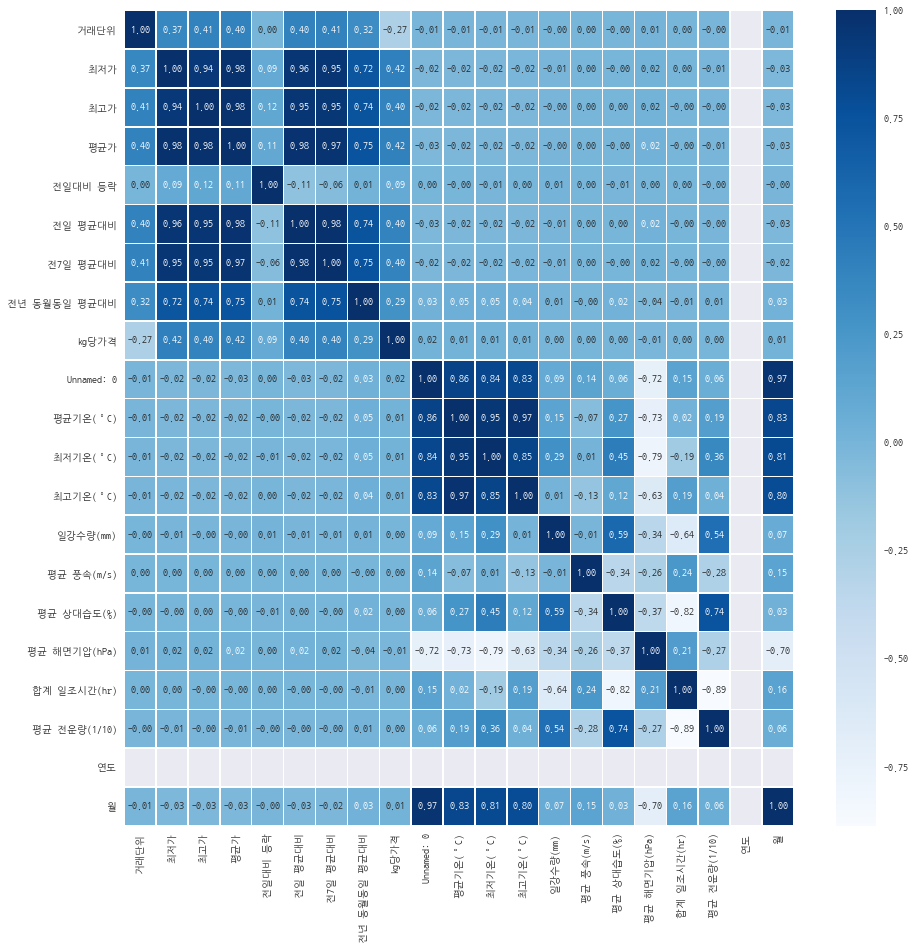

In [25]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = df4.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [21]:
df2 = pd.read_csv('./농작물시세.csv')
# 농작물 그래프 저장 함수
def candle_save(df,item,filename):
    df['날짜'] = pd.to_datetime(df['날짜'])
    df = df.set_index(df['날짜'] )
    grade = df.loc[(df['날짜']>'2020-01-01')&(df['품목']==item)]['등급'].unique()[0]
    kg = df.loc[(df['날짜']>'2020-01-01')&(df['품목']==item)]['거래단위'].unique()[0]
    data = df.loc[(df['품목']==item)&(df['등급']==grade)&(df['거래단위'].str.contains(kg))]
    data_list = []
    name_list = []
    for i in range(len(data.index)):
        if data.index[i].dayofweek == 1:
            data_list.append(i)
            name_list.append((f'{str(data.index[i].month):0>2}'+'-'+f'{str(data.index[i].day):0>2}'))
        else:
            pass
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    ax.xaxis.set_major_locator(ticker.FixedLocator(data_list))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))
    
    mpl_finance.candlestick2_ohlc(ax, opens= data['평균가'][:-1], closes= data['평균가'][1:] 
                              , highs = data['평균가'][1:], lows = data['평균가'][:-1]
                              , width=0.5, colorup='r', colordown='b')
    fig.savefig(filename, dpi=fig.dpi)

KeyboardInterrupt: 

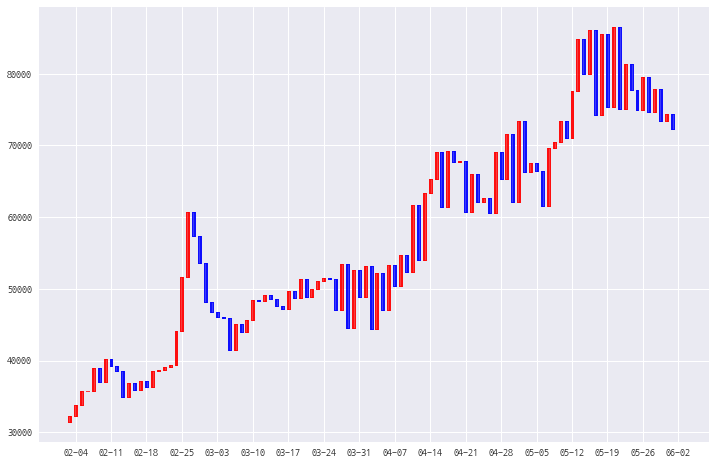

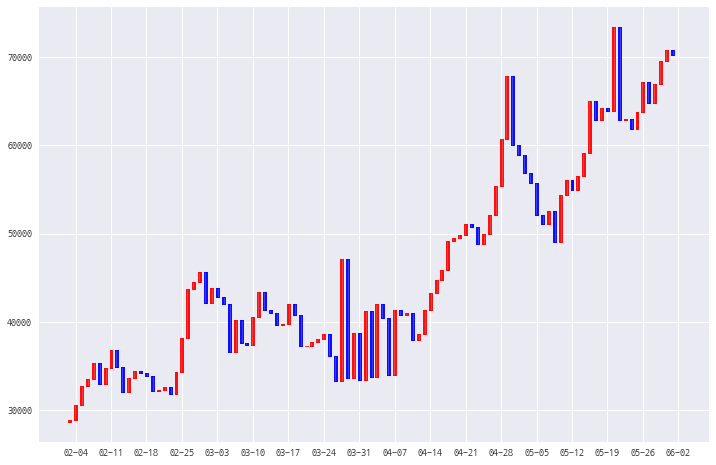

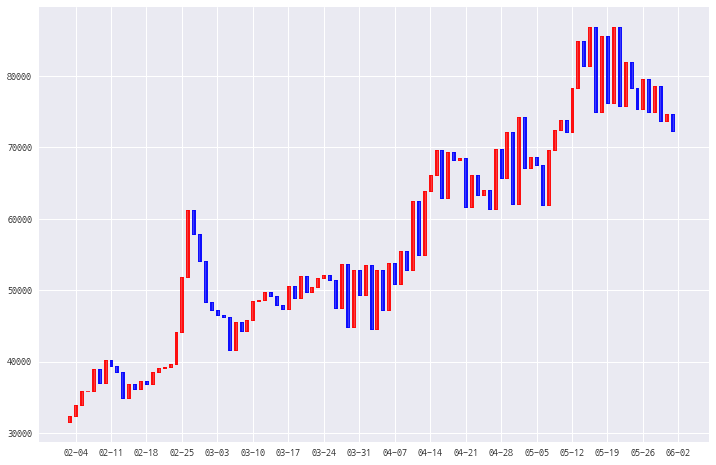

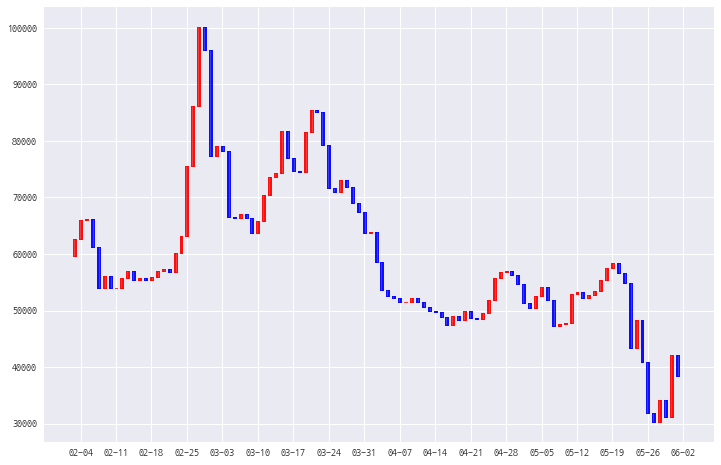

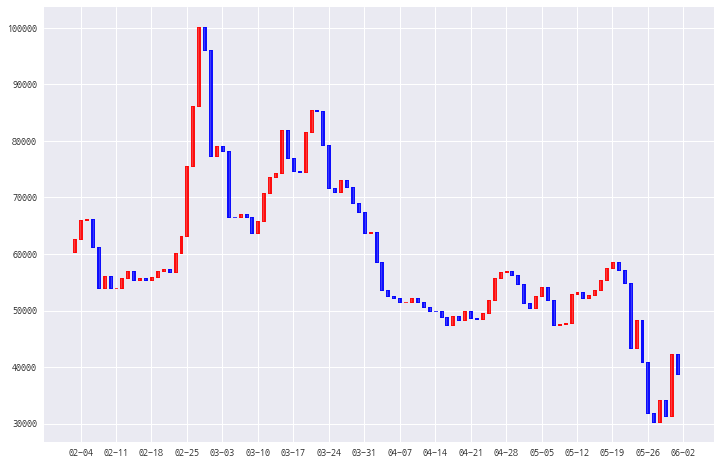

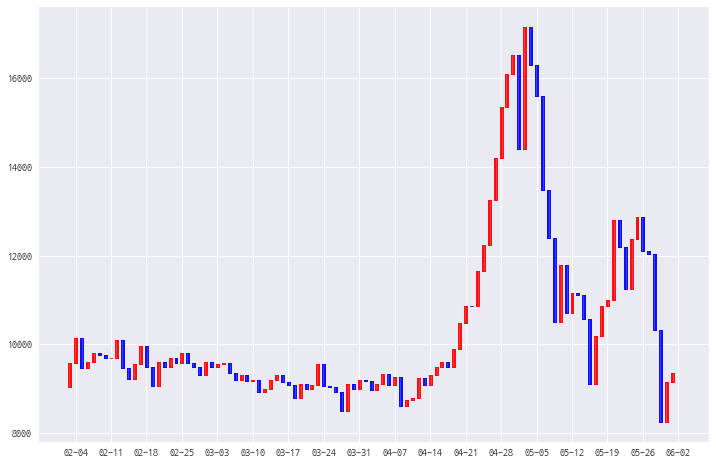

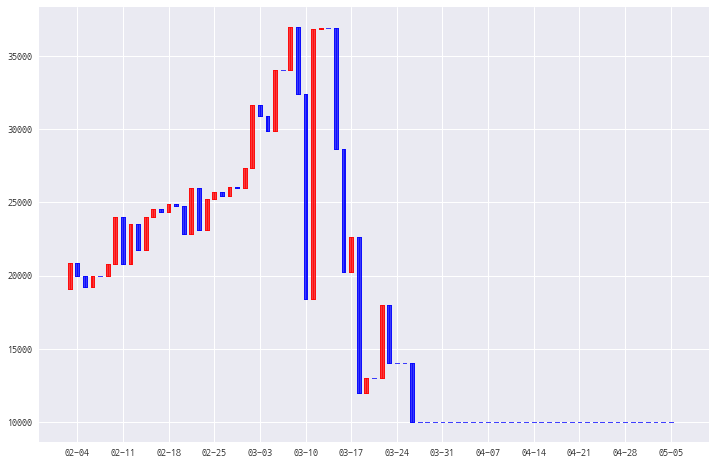

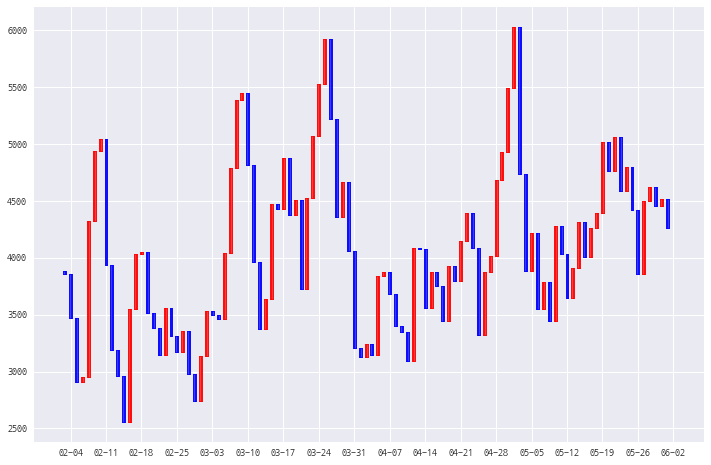

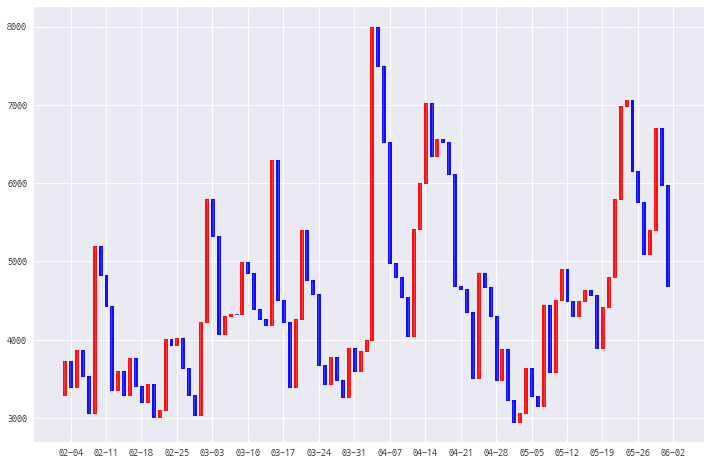

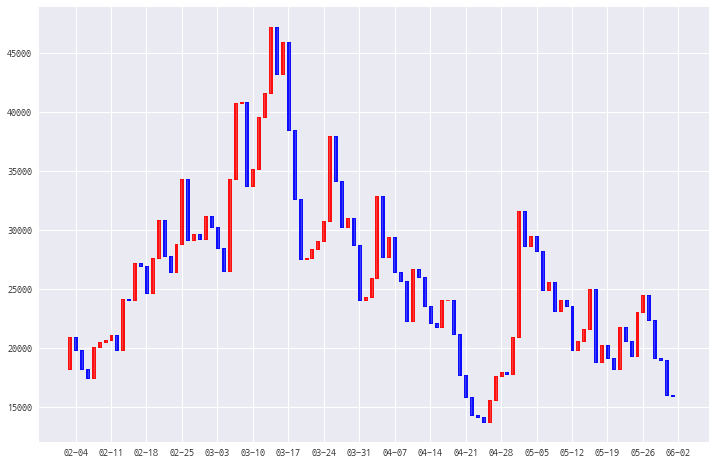

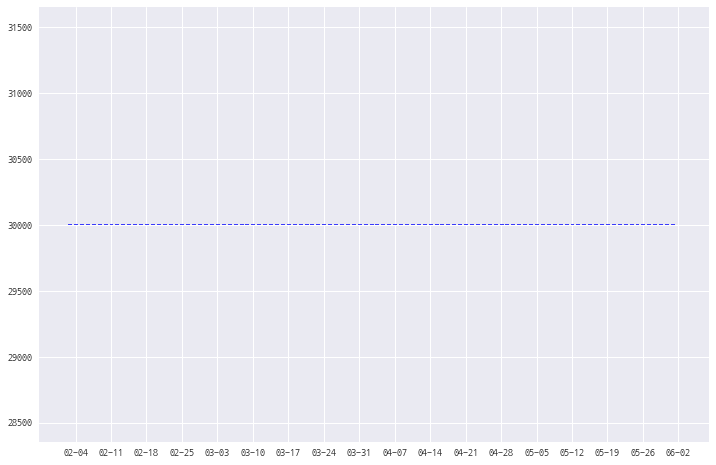

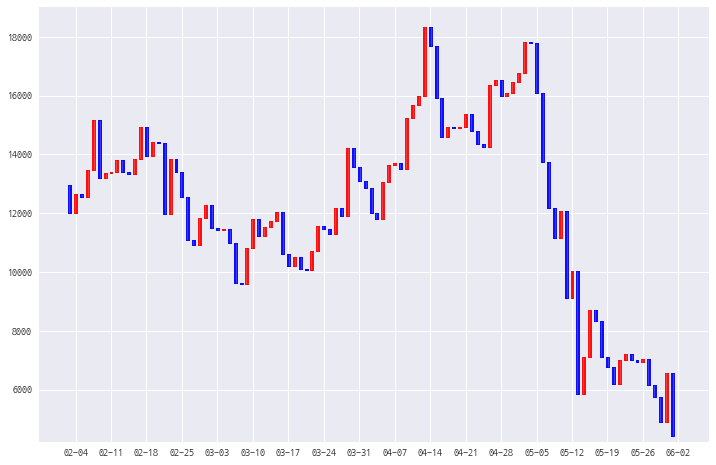

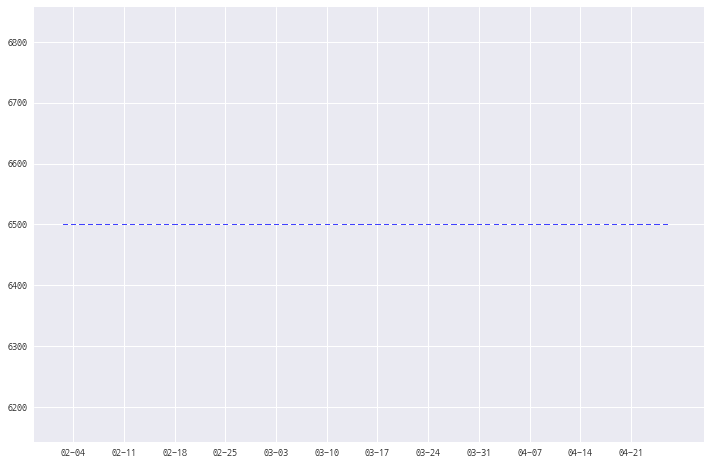

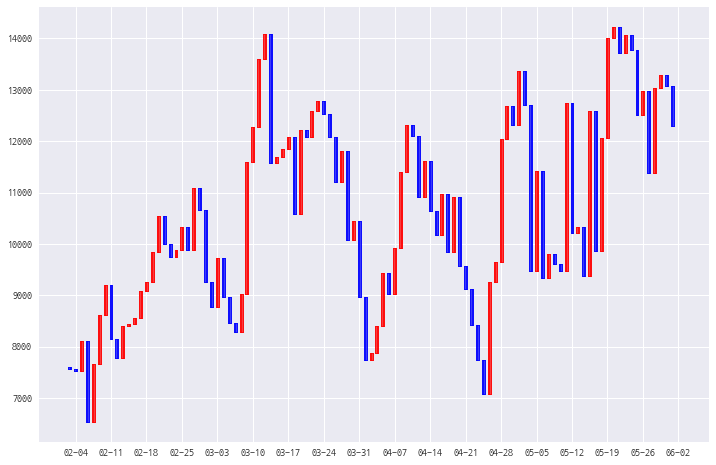

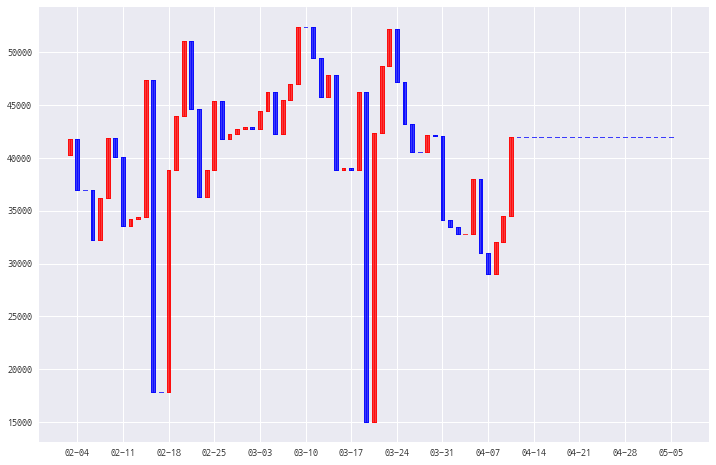

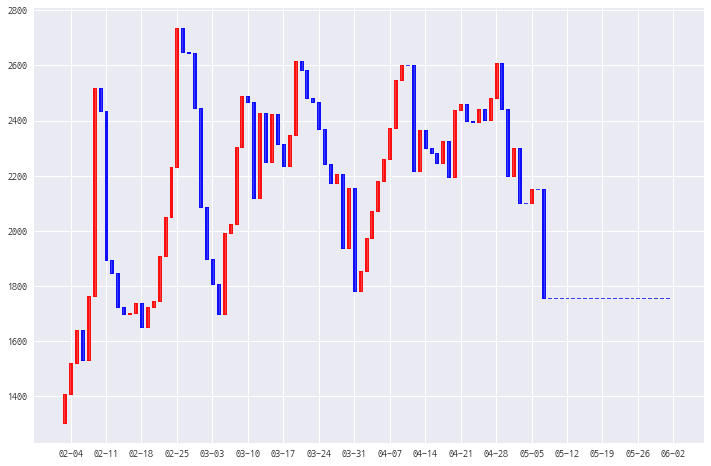

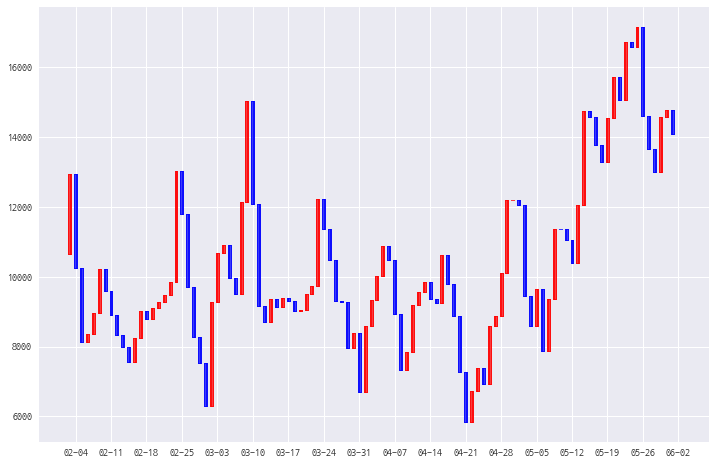

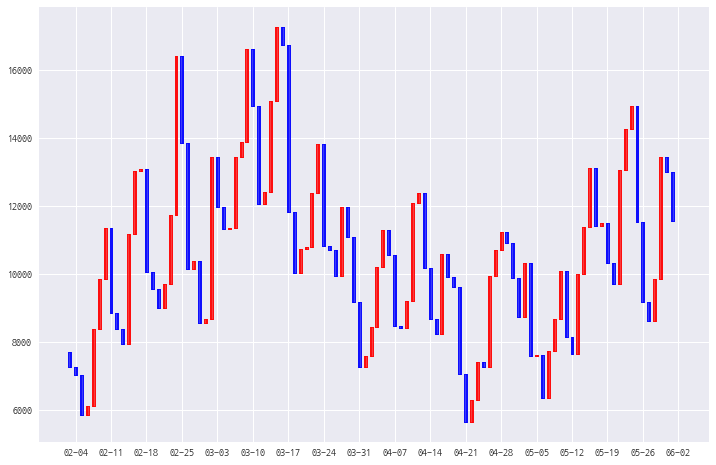

Error in callback <function flush_figures at 0x000000000FCB0678> (for post_execute):


KeyboardInterrupt: 

In [22]:
# candle_save 함수 실행
items = df2['품목'].unique()
for item in items:
    fname = item.replace(' ','')
    fname = fname.replace('(','')
    fname = fname.replace(')','')
    candle_save(df2,item,f'./static/image/{fname}.png')

In [31]:
# 모델 저장 함수
def make_model(price_df,start_day, crop
               , node=64,level=3, epochs=50):
    grade = df2.loc[df2['품목']==item]['등급'].unique()[0]
    kg = df2.loc[df2['품목']==item]['거래단위'].unique()[0]
    price_df = price_df.loc[(price_df['날짜']>=start_day)&(price_df['품목']==crop)
                         &(price_df['등급']==grade)
                         &(price_df['거래단위'].str.contains(kg))][['평균가']]
    data = price_df['평균가']
    p = price_df['평균가']
    seq_len = 50
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data)-sequence_length):
        a = list(p[index:index+sequence_length])
        result.append(a)
        
    nomalized_data = []
    for window in result:
        nomalized_window = [((float(p)/ float(window[0])) - 1) for p in window]
        nomalized_data.append(nomalized_window)

    result = np.array(nomalized_data)
    row = int(round(result.shape[0]*0.8))
    if row >= 50:
        train = result[:row, :]
        np.random.shuffle(train)

        x_train = train[:, :-1]
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        y_train = train[:,-2]

        x_test = result[row:, :-1]
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
        y_test = result[row:,-2]

        model = Sequential()
        for i in range(level):
            model.add(LSTM(node, input_shape=(x_train.shape[1],1), return_sequences=True))
            model.add(Dropout(0.25))
        model.add(LSTM(node, return_sequences=False))
        model.add(Dense(1, activation='linear'))
        model.compile('rmsprop', 'mse')

        model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10
                  , epochs=50, verbose = 1)

        model.save(f'{crop} 모델.h5')
    else:
        pass

In [32]:
# make_model 함수 실행
for item in items:
    make_model(df2,'2019-01-01', item)

In [ ]:
# 모델불러오는 함수
def pred(crop_df, item):
    grade = df2.loc[df2['품목']==item]['등급'].unique()[0]
    kg = df2.loc[df2['품목']==item]['거래단위'].unique()[0]
    p = df2.loc[(df2['품목']==item)&(df2['등급']==grade)
                 &(df2['거래단위']==kg)].tail(50)['평균가'].values
    p = p.reshape(1,50,1)
    nomalized_data = []
    for window in p:
        nomalized_window = [(float(i) / float(window[0]) - 1) for i in window]
        nomalized_data.append(nomalized_window)
    test = np.array(nomalized_data).reshape(1,50,1)  
    model = load_model(f'./{item} 모델.h5')
    result = model.predict(test)
    result = (result[0][0]+1)*p[0][0]
    return round(result[0],0)

In [ ]:
# pred 함수 실행
p_pred = []
for item in items:
    p_pred.append(pred(df2,item))
